In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_wine
from mislabelling import symmetric_noise
from testing import *
from sklearn.model_selection import train_test_split

# ExtraTrees Experiments
Exactly the same as the Experiments Parameters.ipynb experiments, but using and ExtraTreesClassifier instead of a random forest. This was not discussed in the final report

In [2]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 10
TEST_SIZE = 0.25
ITERATIONS = 10

FIG_SIZE = (5,4)
FONT_SIZE = 10
plt.rcParams["figure.figsize"] = FIG_SIZE  # width, height in inches

data = load_wine()

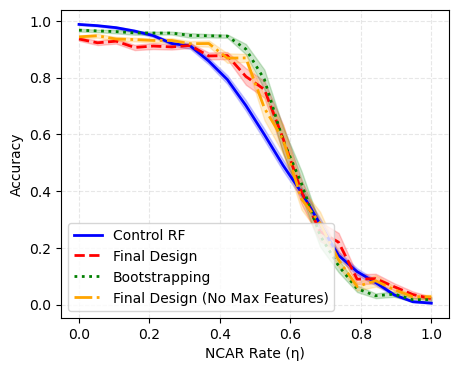

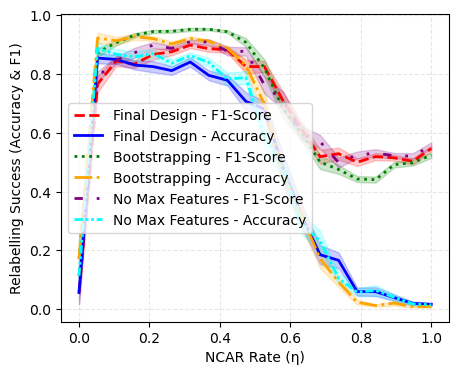

In [3]:
accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, ExtraTreesClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, _ = run_noise_level_experiment(
    data, ExtraTreesClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True
)

accuracies_no_max, auc_no_max, relabelling_f1_no_max, relabelling_acc_no_max, _ = run_noise_level_experiment(
    data, ExtraTreesClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, max_features = None
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)

# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

accuracies_mean_no_max, accuracies_se_no_max = process_experiment_result(accuracies_no_max)
relabelling_f1_success_no_max, relabelling_f1_se_no_max = process_experiment_result(relabelling_f1_no_max)
relabelling_acc_success_no_max, relabelling_acc_se_no_max = process_experiment_result(relabelling_acc_no_max)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Bootstrapping", color='green', linestyle=':')
plot_with_error_band(x_axis, accuracies_mean_no_max[0], accuracies_se_no_max[0], label="Final Design (No Max Features)", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')
plot_with_error_band(x_axis, relabelling_f1_success_no_max[0], relabelling_f1_se_no_max[0], label="No Max Features - F1-Score", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_acc_success_no_max[0], relabelling_acc_se_no_max[0], label="No Max Features - Accuracy", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

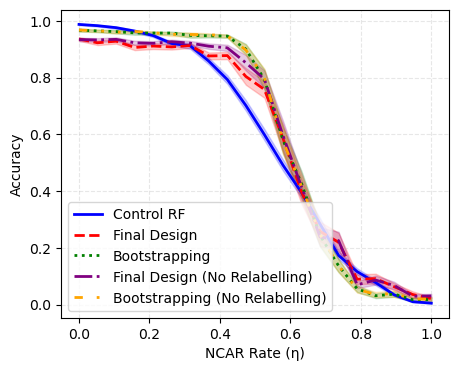

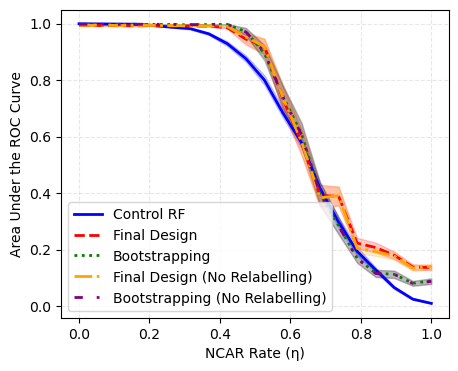

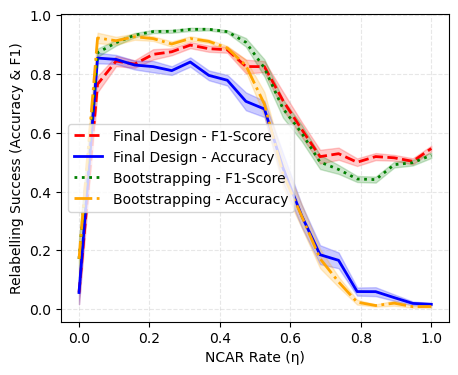

In [4]:
accuracies_all, auc_no_relabelling, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, ExtraTreesClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, relabelling = False
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, ExtraTreesClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True,
    relabelling = False
)

auc_all = np.concatenate([auc_all, auc_no_relabelling[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)

accuracies_mean_no_relabelling, accuracies_se_no_relabelling = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Bootstrapping", color='green', linestyle=':')
plot_with_error_band(x_axis, accuracies_mean_no_relabelling[0], accuracies_se_no_relabelling[0], label="Final Design (No Relabelling)", color='purple', linestyle='-.')
plot_with_error_band(x_axis, accuracies_mean_no_relabelling[-1], accuracies_se_no_relabelling[-1], label="Bootstrapping (No Relabelling)", color='orange', linestyle=(0, (3, 5, 1, 5, 1, 5)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

# Accuracy lines
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Bootstrapping", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[3], auc_se[3], label="Final Design (No Relabelling)", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[4], auc_se[4], label="Bootstrapping (No Relabelling)", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Area Under the ROC Curve")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

In [5]:
print(f"Control AUC Under no Noise: {auc_mean[1][0]:.3f}")
print(f"Initial Design (No Relabelling)(Bootstrapping) AUC Under no Noise: {auc_mean[-1][0]:.3f}")

Control AUC Under no Noise: 1.000
Initial Design (No Relabelling)(Bootstrapping) AUC Under no Noise: 0.998


η with largest performance difference: 0.50
η with largest performance difference (bootstrapping): 0.45


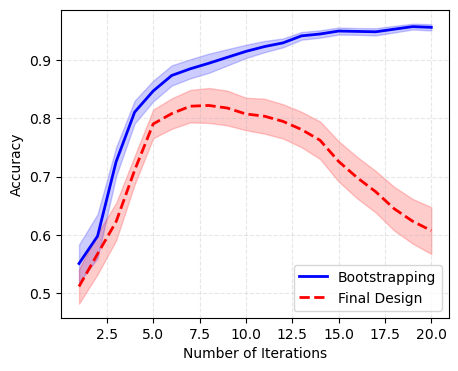

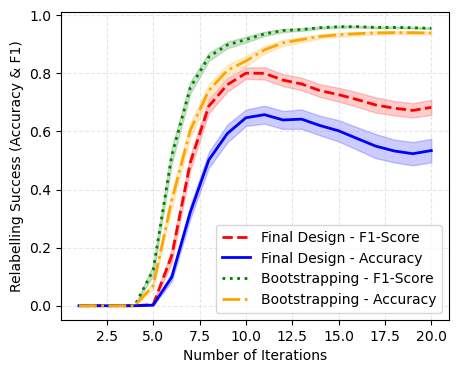

In [6]:
std_diff = np.argmax(accuracies_mean_base[0] - accuracies_mean_base[1])*0.05
boot_diff = np.argmax(accuracies_mean_base[2] - accuracies_mean_base[1])*0.05
print(f"η with largest performance difference: {std_diff:.2f}")
print(f"η with largest performance difference (bootstrapping): {boot_diff:.2f}")

accuracies_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_iteration_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, boot_diff,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=20
)

accuracies_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_iteration_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, boot_diff,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=20,
    bootstrapping= True
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)

accuracies_mean, accuracies_se = process_experiment_result(accuracies_all)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1_all)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Bootstrapping", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Final Design", color='red', linestyle='--')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Number of Iterations")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success[1], relabelling_f1_se[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[1], relabelling_acc_se[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Number of Iterations")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

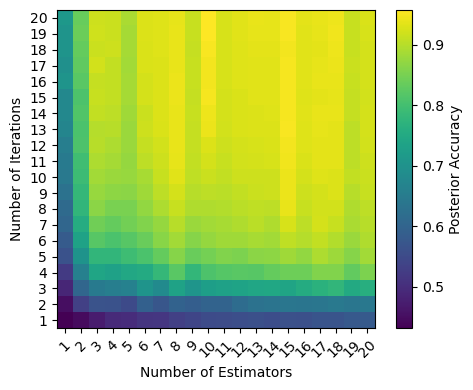

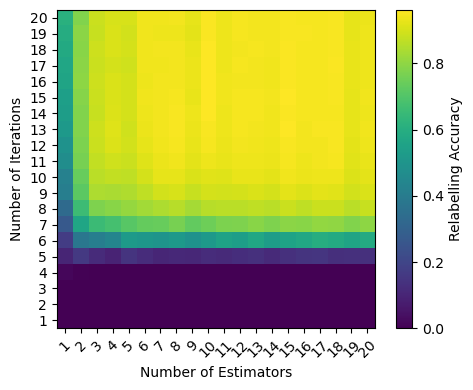

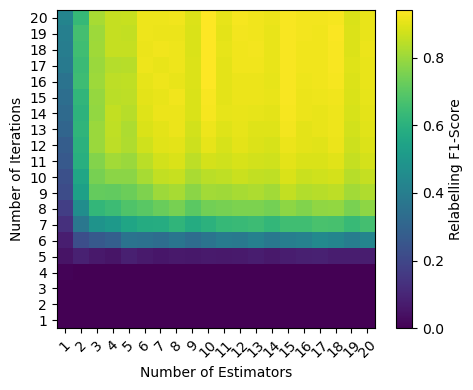

In [7]:
# Prepare 20x20 heatmaps for each metric
accuracy_heatmap = np.zeros((20, 20))
relabelling_acc_heatmap = np.zeros((20, 20))
relabelling_f1_heatmap = np.zeros((20, 20))

# Run experiment for each combination of (iterations, n_estimators)
for est_count in range(1, 21):
    accs, f1s, relabs, _ = run_iteration_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, boot_diff,
    n_estimators = est_count, trials=35,
    bootstrapping = True, test_size=TEST_SIZE, iterations=20
)

    for iter in range(0, 20):
        accuracy_heatmap[iter, est_count - 1] = np.mean(accs[0, iter, :])
        relabelling_acc_heatmap[iter, est_count - 1] = np.mean(f1s[0, iter, :])
        relabelling_f1_heatmap[iter, est_count - 1] = np.mean(relabs[0, iter,:])

plot_heatmap(accuracy_heatmap, list(range(1, 21)), list(range(1, 21)), 
             'Posterior Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_acc_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_f1_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling F1-Score', 'Number of Estimators', 'Number of Iterations')

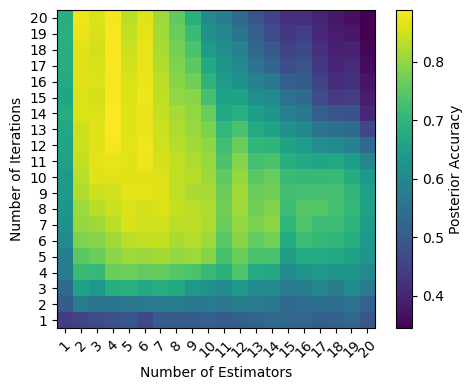

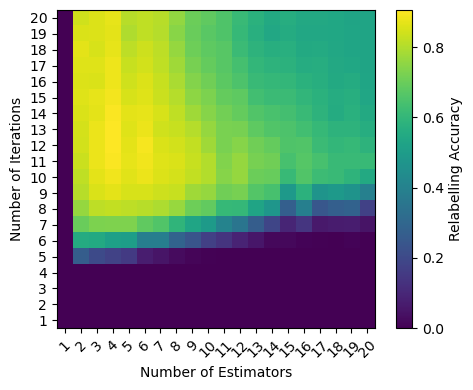

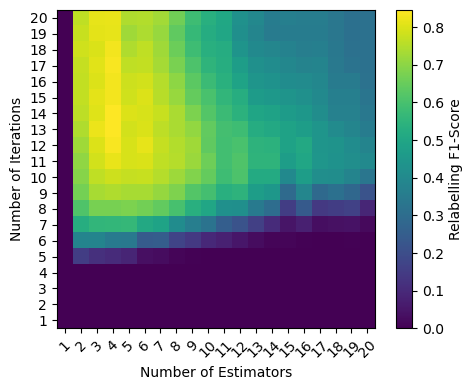

In [8]:
# Prepare 20x20 heatmaps for each metric
accuracy_heatmap = np.zeros((20, 20))
relabelling_acc_heatmap = np.zeros((20, 20))
relabelling_f1_heatmap = np.zeros((20, 20))

# Run experiment for each combination of (iterations, n_estimators)
for est_count in range(1, 21):
    accs, f1s, relabs, _ = run_iteration_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, boot_diff,
    n_estimators = est_count, trials=35,
    bootstrapping = False, test_size=TEST_SIZE, iterations=20
)

    for iter in range(0, 20):
        accuracy_heatmap[iter, est_count - 1] = np.mean(accs[0, iter, :])
        relabelling_acc_heatmap[iter, est_count - 1] = np.mean(f1s[0, iter, :])
        relabelling_f1_heatmap[iter, est_count - 1] = np.mean(relabs[0, iter,:])

plot_heatmap(accuracy_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Posterior Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_acc_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_f1_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling F1-Score', 'Number of Estimators', 'Number of Iterations')

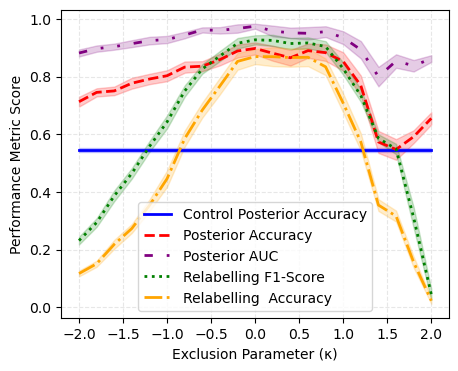

In [9]:
ITERATIONS = 15

acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, 'K', list(np.arange(-2, 2.2, 0.2)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling  Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Exclusion Parameter (κ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

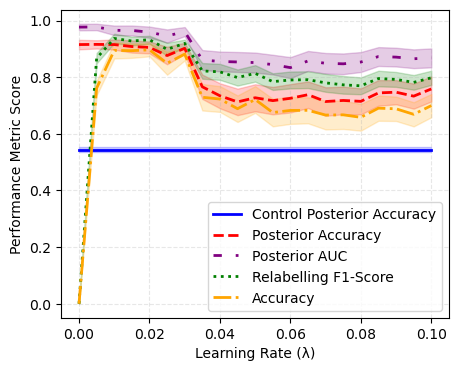

In [10]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, 'L', list(np.arange(0, 0.105, 0.005)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Learning Rate (λ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

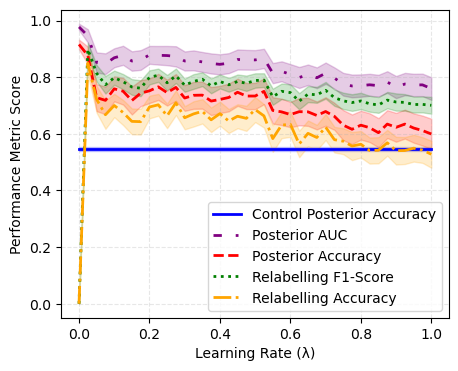

In [11]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, 'L', list(np.arange(0, 1.025, 0.025)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Learning Rate (λ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

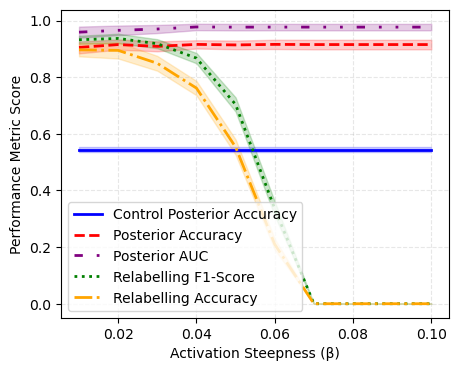

In [12]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, 'B', list(np.arange(0.01, 0.11, 0.01)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Activation Steepness (β)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

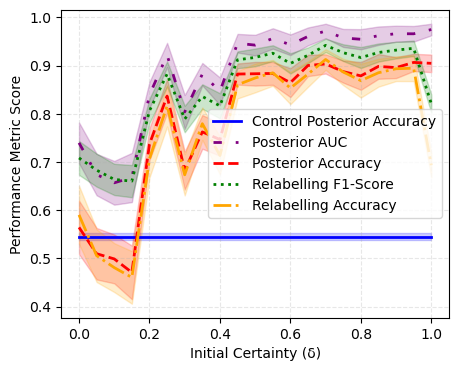

In [13]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, ExtraTreesClassifier, symmetric_noise, 'initial_certainty', list(np.arange(0.0, 1.05, 0.05)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Initial Certainty (δ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()